In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from langchain_openai import ChatOpenAI
from langchain_text_splitters import TokenTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [2]:
main_path = "/home/aswath/Projects/deep_learning/backup_brain/test_4/"

### Demonstration of Knowledge Graph Creation

In [3]:
input_path = main_path + "input/tca_chat.txt"

In [4]:
with open(input_path, 'r') as file:
    content = file.read()

text_splitter = TokenTextSplitter(chunk_size=2000, chunk_overlap=100)
texts = text_splitter.split_text(content)

In [5]:
prompt_template = """
-Goal-
Given a text document about unconventional CEOs and their business strategies, identify all significant entities and relationships related to management philosophy, operational models, and organizational behavior. Also identify communities or clusters of similarly acting individuals or organizations if applicable.

-Steps-
1. Identify all entities. For each identified entity, extract the following information:
- entity_name: Name of the entity, capitalized
- entity_type: One of the following types: [CEO, business strategy, capital allocation approach, acquisition strategy, management style, organizational structure, performance metric, leadership trait, company, investment philosophy, decentralization approach, financial policy, operational efficiency, cultural value, peer group]
- entity_description: Comprehensive description of the entity’s attributes, behaviors, or significance
Format each entity as ("entity"{{tuple_delimiter}}<entity_name>{{tuple_delimiter}}<entity_type>{{tuple_delimiter}}<entity_description>)

2. From the entities identified in step 1, identify all pairs of (source_entity, target_entity) that are *clearly related* to each other.
For each pair of related entities, extract the following information:
- source_entity: name of the source entity, as identified in step 1
- target_entity: name of the target entity, as identified in step 1
- relationship_description: explanation as to why you think the source entity and the target entity are related to each other
- relationship_strength: an integer score between 1 to 10, indicating strength of the relationship between the source entity and target entity
Format each relationship as ("relationship"{{tuple_delimiter}}<source_entity>{{tuple_delimiter}}<target_entity>{{tuple_delimiter}}<relationship_description>{{tuple_delimiter}}<relationship_strength>)

3. Return output in English as a single list of all the entities and relationships identified in steps 1 and 2. Use **{{record_delimiter}}** as the list delimiter.

4. If you have to translate into English, just translate the descriptions, nothing else!

5. When finished, output {{completion_delimiter}}.

-Examples-
######################

entity_types: [CEO, business strategy, capital allocation approach, acquisition strategy, management style, organizational structure, performance metric, leadership trait, company, investment philosophy, decentralization approach, financial policy, operational efficiency, cultural value, peer group]
text: {input_text}
######################
output:
"""

In [6]:
llm = ChatOpenAI(temperature=0.0, model="gpt-4o", api_key= "dummy_val")

prompt = ChatPromptTemplate.from_template(prompt_template)
chain = prompt | llm | StrOutputParser()

In [7]:
response = chain.invoke({"input_text": content[:10000]})

In [8]:
print(response)

("entity" | "John Templeton" | "CEO" | "John Templeton is known for his quote about producing superior performance by doing something different, highlighting his unconventional approach to business leadership.") **{record_delimiter}** ("entity" | "Henry Singleton" | "CEO" | "Henry Singleton was a CEO known for his unconventional management style and superior market performance compared to peers like Jack Welch.") **{record_delimiter}** ("entity" | "Jack Welch" | "CEO" | "Jack Welch is a well-known CEO, often portrayed as a charismatic, action-oriented leader, and a benchmark for market performance.") **{record_delimiter}** ("entity" | "Warren Buffett" | "CEO" | "Warren Buffett is a renowned CEO who identified the 'institutional imperative' as a force that compels CEOs to imitate their peers.") **{record_delimiter}** ("entity" | "Teledyne" | "company" | "Teledyne is a company known for its exceptional market performance under unconventional leadership.") **{record_delimiter}** ("entity"

### Analysing Created Knowledge Graph

In [5]:
entities_path = main_path + "output/entities.parquet"
communities_path = main_path + "output/communities.parquet"
community_reports_path = main_path + "output/community_reports.parquet"
documents_path = main_path + "output/documents.parquet"
relationships_path = "output/relationships.parquet"

entity_df = pd.read_parquet(entities_path)
community_df = pd.read_parquet(communities_path)
community_report_df = pd.read_parquet(community_reports_path)
documents_df = pd.read_parquet(documents_path)
relationships_df = pd.read_parquet(relationships_path)

### Entity

In [14]:
entity_df.head()

,id,human_readable_id,title,type,description,text_unit_ids,frequency,degree,x,y
0,0a642f4c-74bb-443e-b3c0-93a841d6f561,0,MUTHUKUMAR,PERSON,"Muthukumar is the director of Ayali, recognize...",[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...,1,2,0.0,0.0
1,30e51683-d86a-4a89-af1e-7fe5c46e8dc5,1,ZEE ENTERTAINMENT,ORGANIZATION,Zee Entertainment is a media company that inve...,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...,1,2,0.0,0.0
2,108dbbcd-00c8-468a-91d3-bbb0f86e6b8a,2,MOHAN G,PERSON,Mohan G is a reviewer mentioned in the convers...,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...,1,0,NaN,NaN
3,f034ac23-c0a0-4749-8dd0-d6038fac338d,3,DIVAKAR ANNA,PERSON,"Divakar Anna is another reviewer mentioned, po...",[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...,1,0,NaN,NaN
4,8089fdb8-bf41-42a8-b4de-e988da5dcd7c,4,GVM,PERSON,GVM is a person whose birthday was noted in th...,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...,1,0,NaN,NaN


In [16]:
for i in range(entity_df.shape[0]):
    print(f"\n\nEntity : {entity_df.iloc[i]["title"]}    Type : {entity_df.iloc[i]["type"]}")
    print(f"Description : {entity_df.iloc[i]["description"]}")



Entity : MUTHUKUMAR    Type : PERSON
Description : Muthukumar is the director of Ayali, recognized for his talent in the film industry


Entity : ZEE ENTERTAINMENT    Type : ORGANIZATION
Description : Zee Entertainment is a media company that invested in the production of Ayali despite financial losses


Entity : MOHAN G    Type : PERSON
Description : Mohan G is a reviewer mentioned in the conversation, possibly providing reviews on media content


Entity : DIVAKAR ANNA    Type : PERSON
Description : Divakar Anna is another reviewer mentioned, possibly providing reviews on media content


Entity : GVM    Type : PERSON
Description : GVM is a person whose birthday was noted in the conversation, possibly a notable figure among the group


Entity : ADARSH    Type : PERSON
Description : Adarsh is an active participant in the conversation, engaging with others by sharing media links and commenting on various topics. Notably, Adarsh has been involved in discussions regarding Ajith Kumar's s

### Relationships

In [17]:
relationships_df.head()

,id,human_readable_id,source,target,description,weight,combined_degree,text_unit_ids
0,b0cb8e80-28dd-4fde-92d4-7eb52659f60e,0,MUTHUKUMAR,ZEE ENTERTAINMENT,"Muthukumar directed Ayali, which was produced ...",1.0,4,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...
1,db92ec2e-e3a7-48dc-944f-68211494b7d2,1,MUTHUKUMAR,AYALI,"Muthukumar is the director of Ayali, a film me...",8.0,4,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...
2,b553522a-efd6-4355-a9fd-7c8d719c71fa,2,ZEE ENTERTAINMENT,AYALI,Zee Entertainment invested in the production o...,1.0,4,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...
3,791e21ad-8348-4248-9b47-e77063610cab,3,ADARSH,MUTHU MANIMARAN,Adarsh and Muthu Manimaran are both active par...,5.0,6,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...
4,a6346e1e-8542-449f-978b-296dfa2c8f26,4,DHARUN AEROSPACE,KARTHI BRO IITB AERO,Dharun Aerospace added Karthi Bro IITB Aero to...,7.0,2,[b198a1b3deb8f7fb3c5da37c4f98f1c7aa52663fb162f...


In [18]:
for i in range(relationships_df.shape[0]):
    print(f"\n\nSource : {relationships_df.iloc[i]["source"]}    Target : {relationships_df.iloc[i]["target"]}    Weight : {relationships_df.iloc[i]["weight"]}")
    print(f"Description : {relationships_df.iloc[i]["description"]}")



Source : MUTHUKUMAR    Target : ZEE ENTERTAINMENT    Weight : 1.0
Description : Muthukumar directed Ayali, which was produced by Zee Entertainment


Source : MUTHUKUMAR    Target : AYALI    Weight : 8.0
Description : Muthukumar is the director of Ayali, a film mentioned in the conversation


Source : ZEE ENTERTAINMENT    Target : AYALI    Weight : 1.0
Description : Zee Entertainment invested in the production of Ayali


Source : ADARSH    Target : MUTHU MANIMARAN    Weight : 5.0
Description : Adarsh and Muthu Manimaran are both active participants in the conversation, sharing media links and engaging with each other


Source : DHARUN AEROSPACE    Target : KARTHI BRO IITB AERO    Weight : 7.0
Description : Dharun Aerospace added Karthi Bro IITB Aero to the group


Source : AJITH KUMAR    Target : CHENNAI    Weight : 1.0
Description : Ajith Kumar was mobbed at the Chennai airport


Source : AJITH KUMAR    Target : MUTHU MANIMARAN    Weight : 5.0
Description : Muthu Manimaran shared a l

### Communities

In [19]:
community_report_df.head()

,id,human_readable_id,community,level,parent,children,title,summary,full_content,rank,rating_explanation,findings,full_content_json,period,size
0,bd280810a9e145cfa3b86997b5cf1fb1,4,4,1,2,[],Aswath's Academic and Social Engagements,"The community centers around Aswath, who is ac...",# Aswath's Academic and Social Engagements\n\n...,3.5,The impact severity rating is low due to the p...,[{'explanation': 'Aswath is depicted as an ind...,"{\n ""title"": ""Aswath's Academic and Social ...",2025-05-05,6
1,df3ece279726491288dd8550bc36f430,5,5,1,2,[],Vinu Rakav and IIT Bombay Community,"The community centers around Vinu Rakav, a jun...",# Vinu Rakav and IIT Bombay Community\n\nThe c...,3.5,The impact severity rating is low due to the p...,[{'explanation': 'Vinu Rakav is identified as ...,"{\n ""title"": ""Vinu Rakav and IIT Bombay Com...",2025-05-05,5
2,9ec0813cf111469590b25c0576b052ee,0,0,0,-1,[],World Cup 2023 in India,The community centers around the 2023 Cricket ...,# World Cup 2023 in India\n\nThe community cen...,8.5,The impact severity rating is high due to the ...,[{'explanation': 'India is the host country fo...,"{\n ""title"": ""World Cup 2023 in India"",\n ...",2025-05-05,6
3,bf64425110b34ea8b1c988cbb9896d92,1,1,0,-1,[],Vinu Rakav IITB Junior and Associated Network,The community centers around Vinu Rakav IITB J...,# Vinu Rakav IITB Junior and Associated Networ...,4.5,The impact severity rating is moderate due to ...,[{'explanation': 'Vinu Rakav IITB Junior is a ...,"{\n ""title"": ""Vinu Rakav IITB Junior and As...",2025-05-05,7
4,2b00028d61ae48109075eef24a0e69c5,2,2,0,-1,"[4, 5]",Aswath and Vinu Rakav's Academic and Social Ne...,The community centers around Aswath and Vinu R...,# Aswath and Vinu Rakav's Academic and Social ...,4.5,The impact severity rating is moderate due to ...,[{'explanation': 'Aswath is depicted as a well...,"{\n ""title"": ""Aswath and Vinu Rakav's Acade...",2025-05-05,11


In [20]:
for i in range(community_report_df.shape[0]):
    print(f"\n\nTitle : {community_report_df.iloc[i]["title"]}   Rank : {community_report_df.iloc[i]["rank"]}")
    print(f"Rating Explanation : {community_report_df.iloc[i]["rating_explanation"]}")
    print(f"\nSummary : {community_report_df.iloc[i]["summary"]}")



Title : Aswath's Academic and Social Engagements   Rank : 3.5
Rating Explanation : The impact severity rating is low due to the personal and academic nature of the community's activities, which have limited broader implications.

Summary : The community centers around Aswath, who is actively engaged in a variety of discussions ranging from sports to academic pursuits. Aswath's connections include a claim of studying at Oxford University, preparing for end-of-semester exams, and engaging in social media interactions. The community reflects a blend of personal interests and academic responsibilities, with Aswath as the focal point.


Title : Vinu Rakav and IIT Bombay Community   Rank : 3.5
Rating Explanation : The impact severity rating is low due to the primarily personal and academic nature of the interactions within this community.

Summary : The community centers around Vinu Rakav, a junior at the Indian Institute of Technology Bombay (IITB), and his interactions with various entit

### Community

In [21]:
community_report_df.iloc[0]

id                                     bd280810a9e145cfa3b86997b5cf1fb1
human_readable_id                                                     4
community                                                             4
level                                                                 1
parent                                                                2
children                                                             []
title                          Aswath's Academic and Social Engagements
summary               The community centers around Aswath, who is ac...
full_content          # Aswath's Academic and Social Engagements\n\n...
rank                                                                3.5
rating_explanation    The impact severity rating is low due to the p...
findings              [{'explanation': 'Aswath is depicted as an ind...
full_content_json     {\n    "title": "Aswath's Academic and Social ...
period                                                       202

In [22]:
print(f"Title : {community_report_df.iloc[0]["title"]}")
print(f"\nSummary : {community_report_df.iloc[0]["summary"]}")

Title : Aswath's Academic and Social Engagements

Summary : The community centers around Aswath, who is actively engaged in a variety of discussions ranging from sports to academic pursuits. Aswath's connections include a claim of studying at Oxford University, preparing for end-of-semester exams, and engaging in social media interactions. The community reflects a blend of personal interests and academic responsibilities, with Aswath as the focal point.


In [23]:
print(community_report_df.iloc[0]["full_content"])

# Aswath's Academic and Social Engagements

The community centers around Aswath, who is actively engaged in a variety of discussions ranging from sports to academic pursuits. Aswath's connections include a claim of studying at Oxford University, preparing for end-of-semester exams, and engaging in social media interactions. The community reflects a blend of personal interests and academic responsibilities, with Aswath as the focal point.

## Aswath's Diverse Interests

Aswath is depicted as an individual with a wide range of interests, engaging in conversations about cricket, product ownership, and food preferences. This diversity in interests suggests a well-rounded personality that is open to exploring various subjects. His involvement in discussions about cricket, particularly mentioning Thala, indicates a passion for sports [Data: Entities (20); Relationships (13)].

## Academic Focus and Exam Preparation

A significant aspect of Aswath's current activities is his preparation for e

#### Summary under consideration
Diversification through Transportation: Burlington Northern Santa Fe

The acquisition of Burlington Northern Santa Fe in 2010 represents Berkshire Hathaway's strategic diversification into the transportation sector. As the largest railroad in the United States, this acquisition has strengthened the conglomerate's presence in the transportation industry and provided a stable revenue stream [Data: Entities (57); Relationships (55)]. This move aligns with Buffett's strategy of investing in essential infrastructure that supports economic growth.

In [24]:
idx = 57
print(f"Entity : {entity_df.iloc[idx]["title"]}    Type : {entity_df.iloc[idx]["type"]}")
print(f"Description : {entity_df.iloc[idx]["description"]}")

Entity : AKSHAY    Type : PERSON
Description : Akshay is a person mentioned as potentially accompanying Vinu Rakav in Bangalore


In [26]:
idx = 5
print(f"Source : {relationships_df.iloc[idx]["source"]}    Target : {relationships_df.iloc[idx]["target"]}    Weight : {relationships_df.iloc[idx]["weight"]}")
print(f"Description : {relationships_df.iloc[idx]["description"]}")

Source : AJITH KUMAR    Target : CHENNAI    Weight : 1.0
Description : Ajith Kumar was mobbed at the Chennai airport


#### Summary under consideration

Significant Acquisitions: GEICO and General Re

GEICO and General Re are two significant acquisitions by Berkshire Hathaway that highlight its strategic focus on the insurance sector. GEICO, acquired in 1996, has become a major contributor to the conglomerate's portfolio, reflecting its importance and value [Data: Entities (35); Relationships (48)]. General Re, acquired in 1998 for $22 billion, marked the largest transaction in Berkshire Hathaway's history, underscoring the company's commitment to expanding its insurance operations [Data: Entities (45); Relationships (49)].

In [102]:
idx = 45
print(f"Entity : {entity_df.iloc[idx]["title"]}    Type : {entity_df.iloc[idx]["type"]}")
print(f"Description : {entity_df.iloc[idx]["description"]}")

Entity : GENERAL RE    Type : ORGANIZATION
Description : General Re is a prominent reinsurer that was acquired by Berkshire Hathaway in 1998. This acquisition was a significant milestone, as it marked the largest transaction in Berkshire Hathaway's history, with a deal valued at $22 billion.


In [103]:
idx = 49
print(f"Source : {relationships_df.iloc[idx]["source"]}    Target : {relationships_df.iloc[idx]["target"]}    Weight : {relationships_df.iloc[idx]["weight"]}")
print(f"Description : {relationships_df.iloc[idx]["description"]}")

Source : WARREN BUFFETT    Target : GENERAL RE    Weight : 8.0
Description : Warren Buffett acquired General Re in 1998 for $22 billion


### Visualize Graph

In [10]:
G = nx.DiGraph()

In [11]:
for _, row in entity_df.iterrows():
    G.add_node(row['title'], type=row['type'], description=row['description'])

In [12]:
for _, row in relationships_df.iterrows():
    G.add_edge(row['source'], row['target'], description=row['description'], strength=row['weight'])

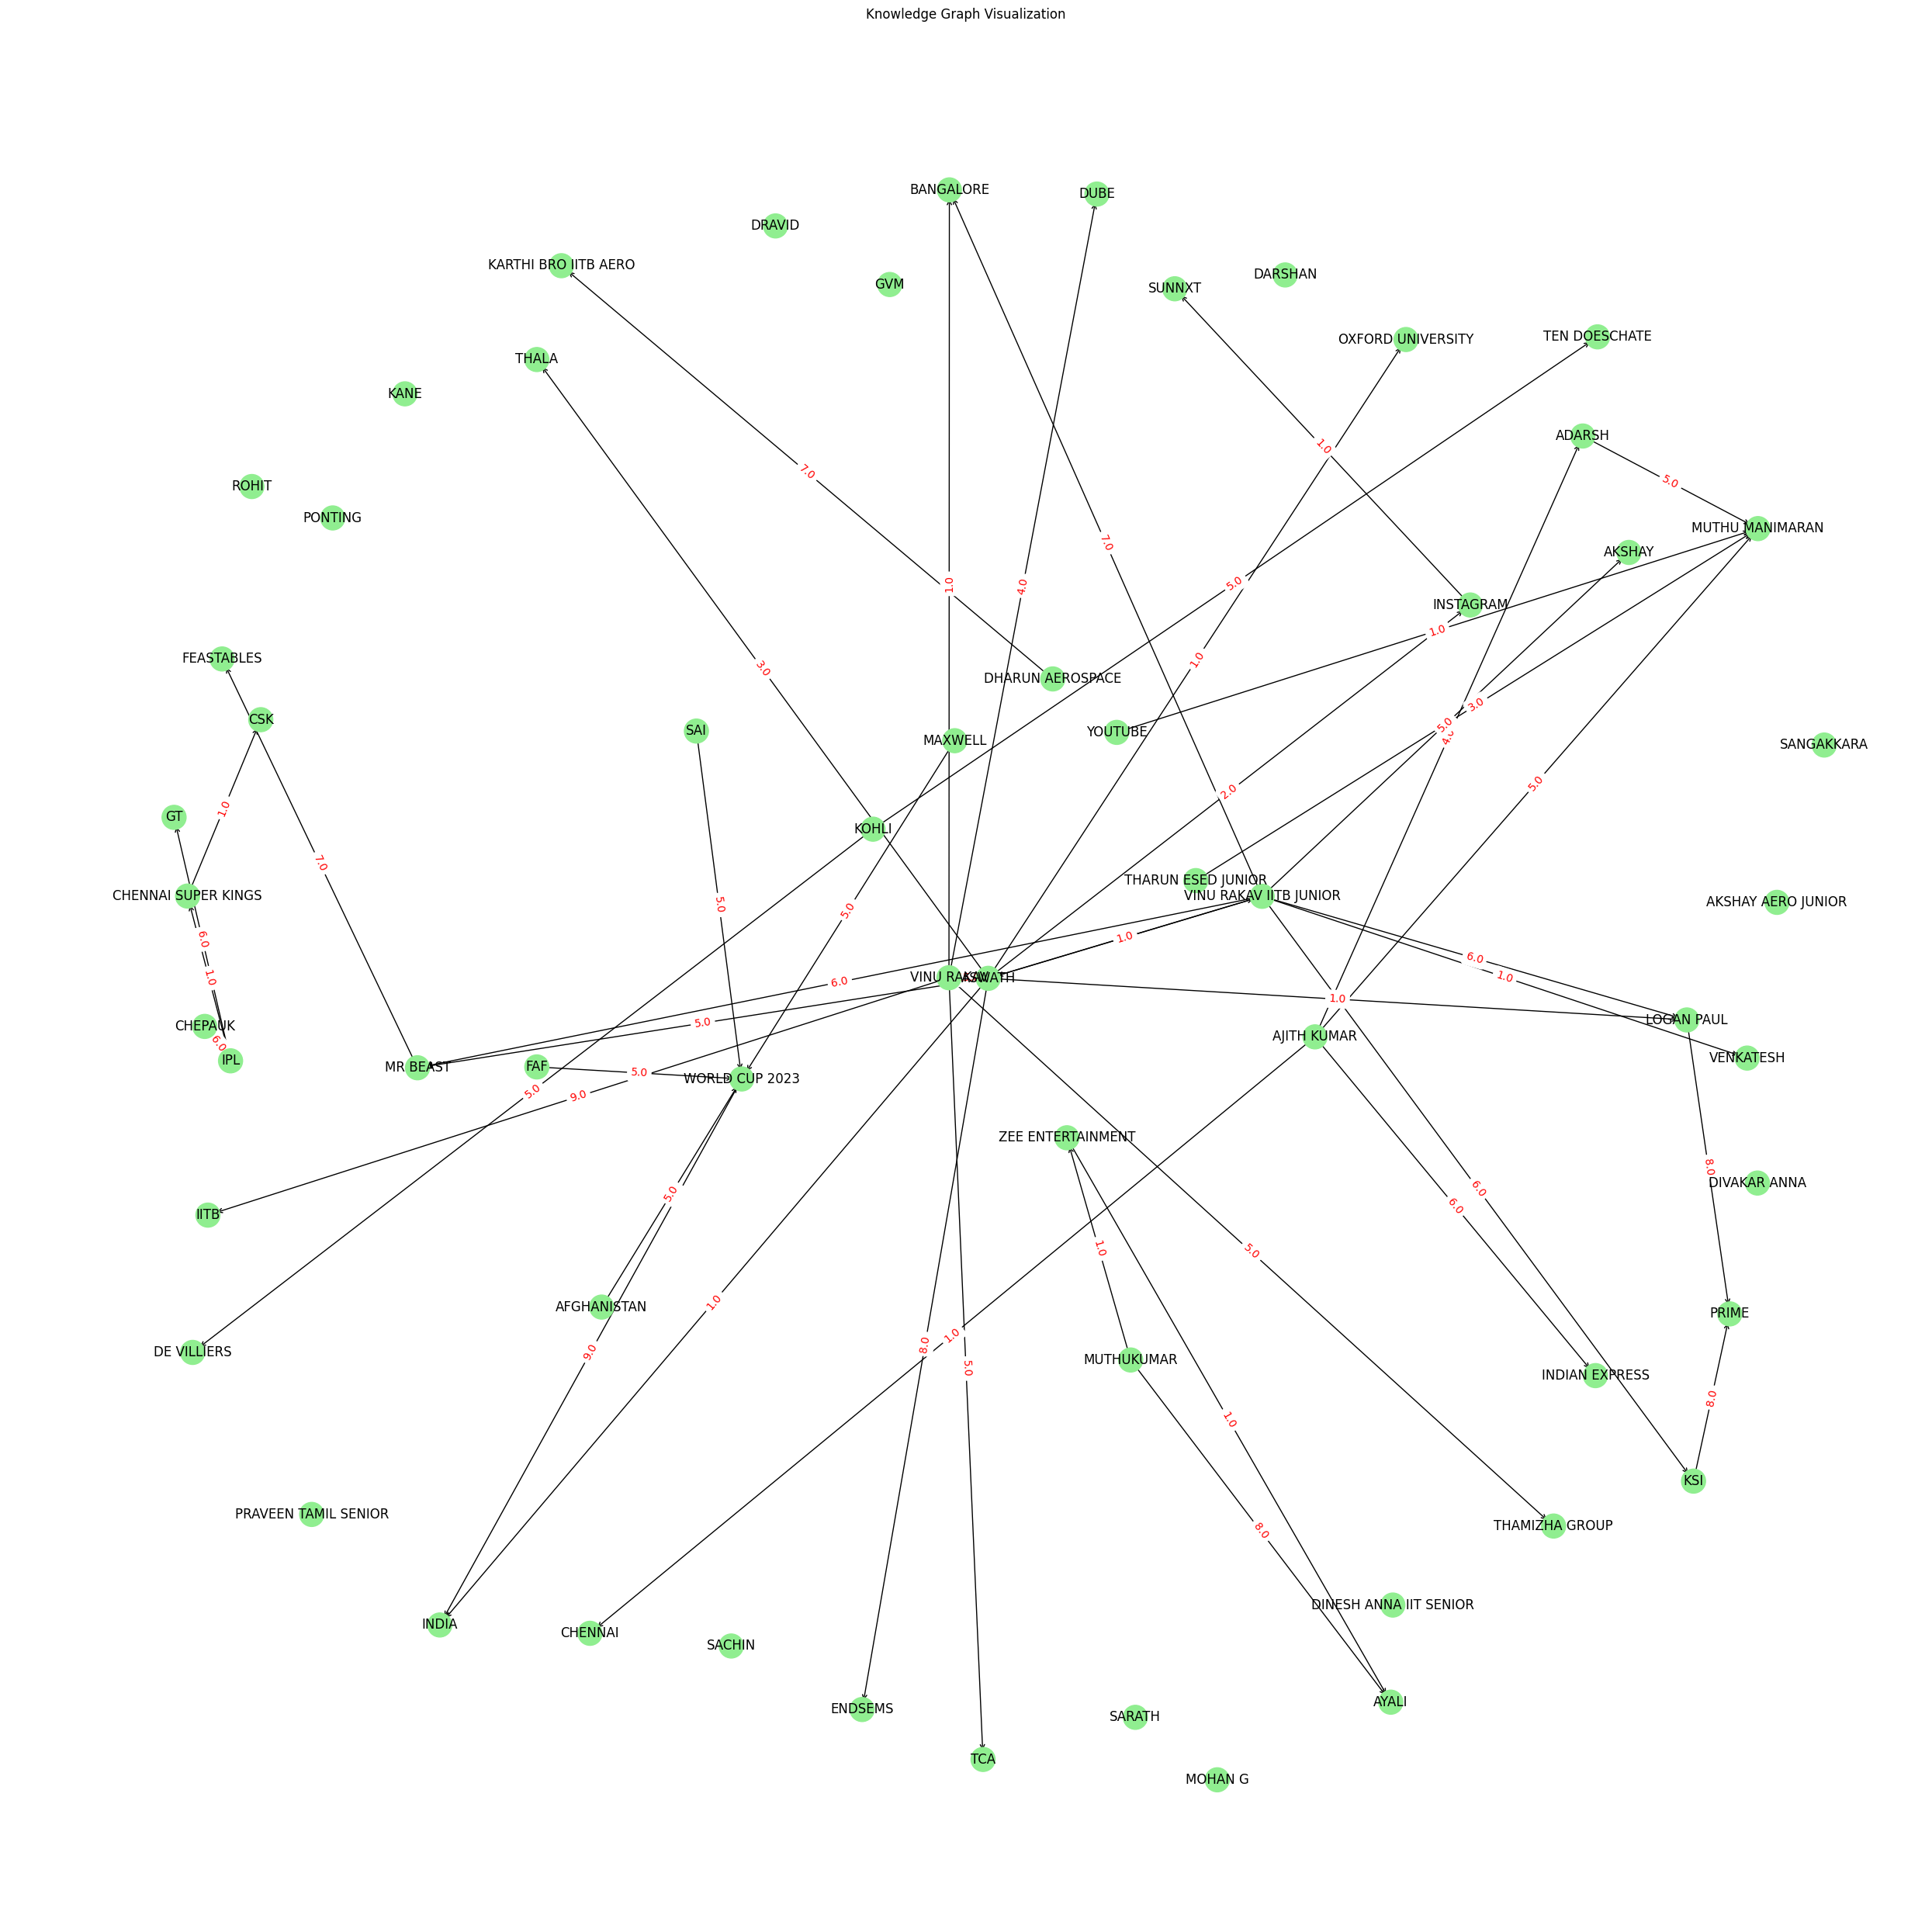

In [13]:
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, k=0.5)

node_colors = ['lightblue' if G.nodes[n]['type'] == 'user' else 'lightgreen' for n in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)

nx.draw_networkx_labels(G, pos, font_size=12)

edge_labels = {(u, v): d['strength'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Knowledge Graph Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()